In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To Scale our data
from sklearn.preprocessing import scale

In [3]:
#reading the dataset
leads = pd.read_csv("./leads.csv")

In [4]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
leads.shape

(9240, 37)

In [6]:
#Replacing space from column names for easy handling
leads.columns = leads.columns.str.replace(" ", "_")

In [7]:
leads.isnull().sum()

Prospect_ID                                         0
Lead_Number                                         0
Lead_Origin                                         0
Lead_Source                                        36
Do_Not_Email                                        0
Do_Not_Call                                         0
Converted                                           0
TotalVisits                                       137
Total_Time_Spent_on_Website                         0
Page_Views_Per_Visit                              137
Last_Activity                                     103
Country                                          2461
Specialization                                   1438
How_did_you_hear_about_X_Education               2207
What_is_your_current_occupation                  2690
What_matters_most_to_you_in_choosing_a_course    2709
Search                                              0
Magazine                                            0
Newspaper_Article           

In [8]:
round(100 * leads.isnull().sum()/len(leads.index),2)

Prospect_ID                                       0.00
Lead_Number                                       0.00
Lead_Origin                                       0.00
Lead_Source                                       0.39
Do_Not_Email                                      0.00
Do_Not_Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total_Time_Spent_on_Website                       0.00
Page_Views_Per_Visit                              1.48
Last_Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How_did_you_hear_about_X_Education               23.89
What_is_your_current_occupation                  29.11
What_matters_most_to_you_in_choosing_a_course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper_

In [9]:
#Deleting All columns with high NUll values as this will not help with model building
toDrop = ['Country','Specialization', 'How_did_you_hear_about_X_Education','What_is_your_current_occupation',
          'What_matters_most_to_you_in_choosing_a_course', 'Tags', 'Lead_Quality', 'Lead_Profile', 'City',
          'Asymmetrique_Activity_Index','Asymmetrique_Profile_Index', 'Asymmetrique_Activity_Score', 'Asymmetrique_Profile_Score']
leads.drop(toDrop, axis=1, inplace=True)

In [10]:
leads.isnull().sum()

Prospect_ID                                   0
Lead_Number                                   0
Lead_Origin                                   0
Lead_Source                                  36
Do_Not_Email                                  0
Do_Not_Call                                   0
Converted                                     0
TotalVisits                                 137
Total_Time_Spent_on_Website                   0
Page_Views_Per_Visit                        137
Last_Activity                               103
Search                                        0
Magazine                                      0
Newspaper_Article                             0
X_Education_Forums                            0
Newspaper                                     0
Digital_Advertisement                         0
Through_Recommendations                       0
Receive_More_Updates_About_Our_Courses        0
Update_me_on_Supply_Chain_Content             0
Get_updates_on_DM_Content               

In [11]:
leads.Lead_Number.unique()

array([660737, 660728, 660727, ..., 579545, 579538, 579533], dtype=int64)

In [12]:
#TotalVisits looks important column and only 1.5% values are NUll thus deleting these rows. 

leads = leads[~leads.TotalVisits.isnull()]

In [13]:
leads.isnull().sum()

Prospect_ID                                  0
Lead_Number                                  0
Lead_Origin                                  0
Lead_Source                                 29
Do_Not_Email                                 0
Do_Not_Call                                  0
Converted                                    0
TotalVisits                                  0
Total_Time_Spent_on_Website                  0
Page_Views_Per_Visit                         0
Last_Activity                                0
Search                                       0
Magazine                                     0
Newspaper_Article                            0
X_Education_Forums                           0
Newspaper                                    0
Digital_Advertisement                        0
Through_Recommendations                      0
Receive_More_Updates_About_Our_Courses       0
Update_me_on_Supply_Chain_Content            0
Get_updates_on_DM_Content                    0
I_agree_to_pa

In [14]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 24 columns):
Prospect_ID                                 9103 non-null object
Lead_Number                                 9103 non-null int64
Lead_Origin                                 9103 non-null object
Lead_Source                                 9074 non-null object
Do_Not_Email                                9103 non-null object
Do_Not_Call                                 9103 non-null object
Converted                                   9103 non-null int64
TotalVisits                                 9103 non-null float64
Total_Time_Spent_on_Website                 9103 non-null int64
Page_Views_Per_Visit                        9103 non-null float64
Last_Activity                               9103 non-null object
Search                                      9103 non-null object
Magazine                                    9103 non-null object
Newspaper_Article                           9103 

In [15]:
leads.Lead_Source.unique()

#Might have to leave this feature as dummy generation will not give useful results, >20 different values
#Another way to create category Other and putting low frequency values in that

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Reference', 'google', 'Welingak Website',
       'Facebook', 'blog', 'Pay per Click Ads', 'bing', 'Social Media',
       nan, 'WeLearn', 'Click2call', 'Live Chat', 'welearnblog_Home',
       'youtubechannel', 'testone', 'Press_Release', 'NC_EDM'],
      dtype=object)

In [16]:
print(leads.Lead_Source.value_counts())
leads.Lead_Source = leads.Lead_Source.apply(lambda x : 'Google' if x == 'google' else x)
leads.Lead_Source.value_counts()
#Imputing Small count values in Others, it will impute for Null values also.. going ahead as count is not high

leads.Lead_Source = leads.Lead_Source.apply(lambda x : 'Others' if ((x != 'Google') & (x != 'Direct Traffic') & (x != 'Olark Chat') & (x != 'Organic Search') & (x != 'Reference') & (x != 'Welingak Website') & (x != 'Referral Sites') ) else x)
leads.Lead_Source.value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
welearnblog_Home        1
WeLearn                 1
youtubechannel          1
testone                 1
blog                    1
NC_EDM                  1
Pay per Click Ads       1
Name: Lead_Source, dtype: int64


Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Others                83
Name: Lead_Source, dtype: int64

In [17]:
leads.isnull().sum()

Prospect_ID                                 0
Lead_Number                                 0
Lead_Origin                                 0
Lead_Source                                 0
Do_Not_Email                                0
Do_Not_Call                                 0
Converted                                   0
TotalVisits                                 0
Total_Time_Spent_on_Website                 0
Page_Views_Per_Visit                        0
Last_Activity                               0
Search                                      0
Magazine                                    0
Newspaper_Article                           0
X_Education_Forums                          0
Newspaper                                   0
Digital_Advertisement                       0
Through_Recommendations                     0
Receive_More_Updates_About_Our_Courses      0
Update_me_on_Supply_Chain_Content           0
Get_updates_on_DM_Content                   0
I_agree_to_pay_the_amount_through_

In [18]:
leads.Lead_Origin.value_counts()

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead_Origin, dtype: int64

In [19]:
leads.Do_Not_Call.unique()

array(['No', 'Yes'], dtype=object)

In [20]:
leads.describe()

,Lead_Number,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit
count,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000
mean,617027.742612,0.380204,3.445238,481.350104,2.362820
std,23337.138926,0.485464,4.854853,545.066142,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596408.000000,0.000000,1.000000,9.000000,1.000000
50%,615278.000000,0.000000,3.000000,244.000000,2.000000
75%,637166.000000,1.000000,5.000000,919.500000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [21]:
print(leads.Last_Activity.value_counts())

#Keeping low frequency values in same bin
leads.Last_Activity.fillna('Others', inplace=True)

leads.Last_Activity = leads.Last_Activity.apply(lambda x : 'Others' if ((x != 'Email Opened') & (x != 'SMS Sent') & (x != 'Olark Chat Conversation') & (x != 'Page Visited on Website') & (x != 'Converted to Lead') & (x != 'Email Bounced') & (x != 'Email Link Clicked') & (x != 'Form Submitted on Website') ) else x)
leads.Last_Activity.value_counts()

Email Opened                    3437
SMS Sent                        2738
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      61
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last_Activity, dtype: int64


Email Opened                 3437
SMS Sent                     2738
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Others                        193
Form Submitted on Website     116
Name: Last_Activity, dtype: int64

In [22]:
leads.Last_Notable_Activity.value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Email Received                     1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Name: Last_Notable_Activity, dtype: int64

In [23]:
print(leads.Newspaper.value_counts())
print(leads.Search.value_counts())
print(leads.Magazine.value_counts())

#Very small count of Yes, deleting these columns, will not be of use for model
leads.drop(['Search', 'Newspaper', 'Magazine','Newspaper_Article','X_Education_Forums','Digital_Advertisement'], axis=1, inplace=True)



No     9102
Yes       1
Name: Newspaper, dtype: int64
No     9089
Yes      14
Name: Search, dtype: int64
No    9103
Name: Magazine, dtype: int64


In [24]:
print(leads.Through_Recommendations.value_counts())
leads.drop(['Through_Recommendations','Update_me_on_Supply_Chain_Content','Get_updates_on_DM_Content','I_agree_to_pay_the_amount_through_cheque'], axis=1, inplace=True)

No     9096
Yes       7
Name: Through_Recommendations, dtype: int64


In [25]:
print(leads.Receive_More_Updates_About_Our_Courses.value_counts())
leads.drop(['Receive_More_Updates_About_Our_Courses'],1,inplace=True)

No    9103
Name: Receive_More_Updates_About_Our_Courses, dtype: int64


In [26]:
print(leads.A_free_copy_of_Mastering_The_Interview.value_counts())

No     6215
Yes    2888
Name: A_free_copy_of_Mastering_The_Interview, dtype: int64


In [27]:
leads.Converted.value_counts()

0    5642
1    3461
Name: Converted, dtype: int64

In [28]:
leads.Last_Notable_Activity.value_counts()
#Looks to be carrying duplicate information of Last_Activity, deleting

leads.drop(['Last_Notable_Activity'], axis=1, inplace=True)

In [29]:
leads.Last_Activity.value_counts()

Email Opened                 3437
SMS Sent                     2738
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Others                        193
Form Submitted on Website     116
Name: Last_Activity, dtype: int64

In [30]:
#Only No values, dropping
leads.drop(['Do_Not_Call'], axis=1, inplace=True)

In [31]:
leads.isnull().sum()

Prospect_ID                               0
Lead_Number                               0
Lead_Origin                               0
Lead_Source                               0
Do_Not_Email                              0
Converted                                 0
TotalVisits                               0
Total_Time_Spent_on_Website               0
Page_Views_Per_Visit                      0
Last_Activity                             0
A_free_copy_of_Mastering_The_Interview    0
dtype: int64

In [32]:
leads.duplicated().sum()

0

In [33]:
leads.describe()

,Lead_Number,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit
count,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000
mean,617027.742612,0.380204,3.445238,481.350104,2.362820
std,23337.138926,0.485464,4.854853,545.066142,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596408.000000,0.000000,1.000000,9.000000,1.000000
50%,615278.000000,0.000000,3.000000,244.000000,2.000000
75%,637166.000000,1.000000,5.000000,919.500000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [34]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 11 columns):
Prospect_ID                               9103 non-null object
Lead_Number                               9103 non-null int64
Lead_Origin                               9103 non-null object
Lead_Source                               9103 non-null object
Do_Not_Email                              9103 non-null object
Converted                                 9103 non-null int64
TotalVisits                               9103 non-null float64
Total_Time_Spent_on_Website               9103 non-null int64
Page_Views_Per_Visit                      9103 non-null float64
Last_Activity                             9103 non-null object
A_free_copy_of_Mastering_The_Interview    9103 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 853.4+ KB


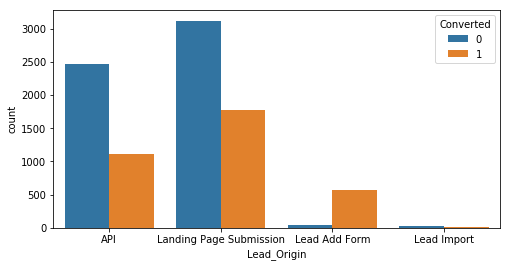

In [35]:
plt.figure(figsize=(8, 4))
sns.countplot(hue = "Converted", x='Lead_Origin',data = leads)

#Lead Add form gives high probability of Lead conversion

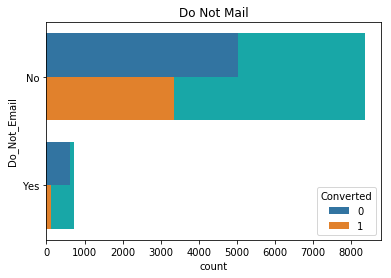

In [36]:
sns.countplot(y = "Do_Not_Email", color='c',data = leads).set_title('Do Not Mail')
sns.countplot(hue = "Converted",y='Do_Not_Email',data = leads)
#People saying do not mail - can also be converted

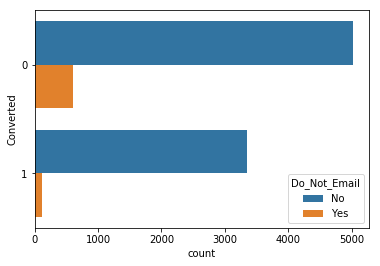

In [37]:
sns.countplot(y = "Converted", hue='Do_Not_Email', data = leads)

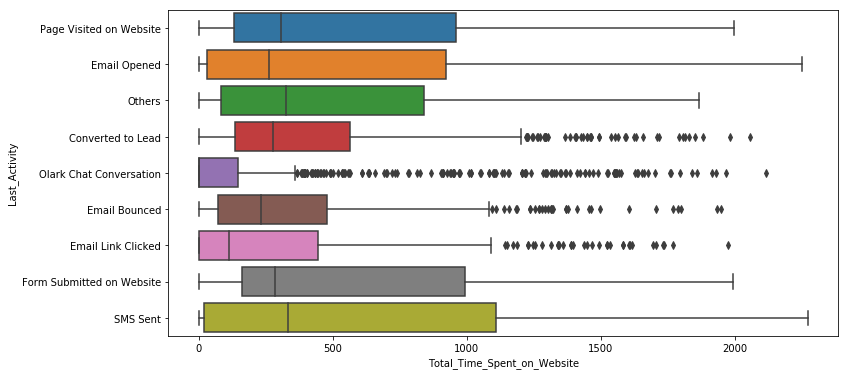

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(y='Last_Activity', x='Total_Time_Spent_on_Website', data=leads)
plt.show()

#SMS sent state people spend more time on website
#Outliers are there in data, needs to be checked later on

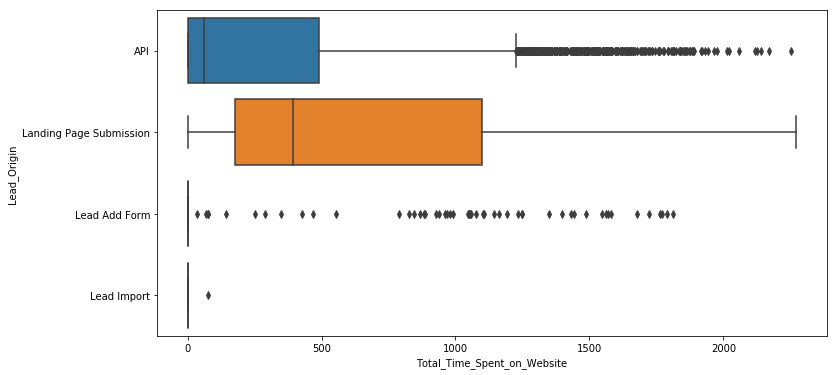

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(y='Lead_Origin', x='Total_Time_Spent_on_Website', data=leads)
plt.show()

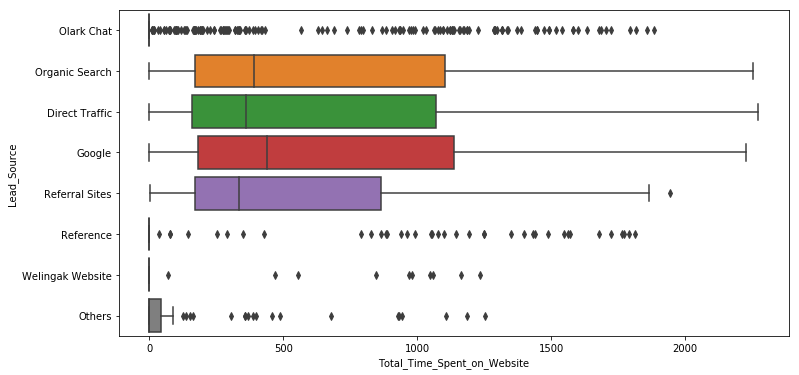

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(y='Lead_Source', x='Total_Time_Spent_on_Website', data=leads)
plt.show()

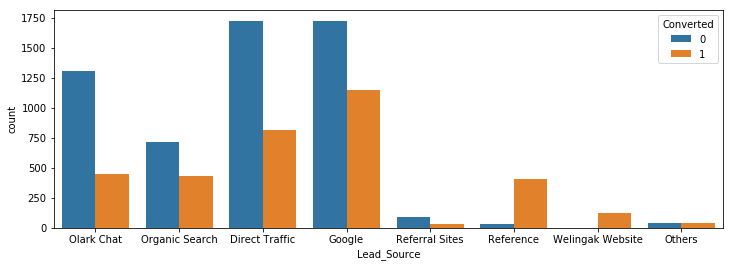

In [41]:
plt.figure(figsize=(12, 4))

sns.countplot(hue = "Converted", x='Lead_Source',data = leads)
#Reference gives very high lead converion possibility

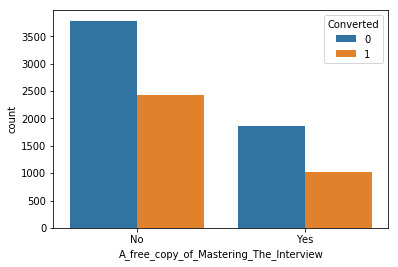

In [42]:
  
plt.figure(figsize=(6, 4))
#sns.countplot(h = "Converted", color='c',data = leads)
sns.countplot(hue = "Converted", x='A_free_copy_of_Mastering_The_Interview',data = leads)
#Not much difference in both cases

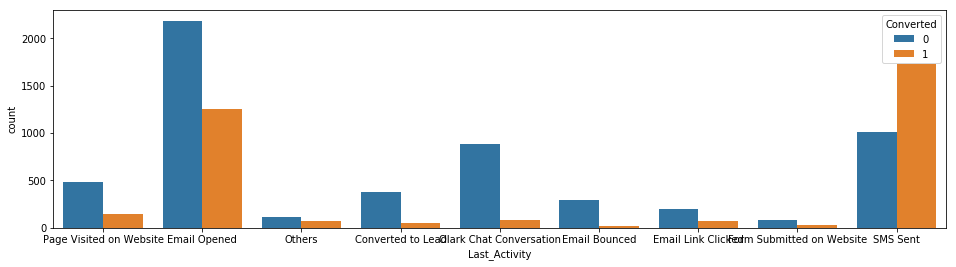

In [43]:
plt.figure(figsize=(16, 4))

sns.countplot(hue = "Converted", x='Last_Activity',data = leads)
#SMS sent status says that lead is hot lead and can be converted

In [44]:
leads.head()

,Prospect_ID,Lead_Number,Lead_Origin,Lead_Source,Do_Not_Email,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,A_free_copy_of_Mastering_The_Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,No


In [45]:
#Converting Yes/No to 1/0
# List of variables to map

varlist =  ['Do_Not_Email', 'A_free_copy_of_Mastering_The_Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the list
leads[varlist] = leads[varlist].apply(binary_map)

In [46]:
leads.head()

,Prospect_ID,Lead_Number,Lead_Origin,Lead_Source,Do_Not_Email,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,A_free_copy_of_Mastering_The_Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,0


In [47]:
#For Categorical variable, generating dummy variables
dummy1 = pd.get_dummies(leads[['Lead_Origin', 'Lead_Source', 'Last_Activity']], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy1], axis=1)

In [48]:
leads.drop(['Lead_Origin', 'Lead_Source', 'Last_Activity'], axis=1, inplace=True)

In [49]:
leads.head()

,Prospect_ID,Lead_Number,Do_Not_Email,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,A_free_copy_of_Mastering_The_Interview,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,...,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Others,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,1532,2.0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,1.0,305,1.0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,1,2.0,1428,1.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 26 columns):
Prospect_ID                                9103 non-null object
Lead_Number                                9103 non-null int64
Do_Not_Email                               9103 non-null int64
Converted                                  9103 non-null int64
TotalVisits                                9103 non-null float64
Total_Time_Spent_on_Website                9103 non-null int64
Page_Views_Per_Visit                       9103 non-null float64
A_free_copy_of_Mastering_The_Interview     9103 non-null int64
Lead_Origin_Landing Page Submission        9103 non-null uint8
Lead_Origin_Lead Add Form                  9103 non-null uint8
Lead_Origin_Lead Import                    9103 non-null uint8
Lead_Source_Google                         9103 non-null uint8
Lead_Source_Olark Chat                     9103 non-null uint8
Lead_Source_Organic Search                 9103 non-null uint8
Lead_S

In [51]:
#Checking for outliers in continuous features

leads[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit
count,9103.000000,9103.000000,9103.000000
mean,3.445238,481.350104,2.362820
std,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,9.000000,1.000000
50%,3.000000,244.000000,2.000000
75%,5.000000,919.500000,3.000000
90%,7.000000,1372.000000,5.000000
95%,10.000000,1556.900000,6.000000
99%,17.000000,1838.960000,9.000000


In [52]:
leads.loc[leads.TotalVisits > leads.TotalVisits.quantile(0.998)]

#15 entries which are beyond 99.8 percentile

,Prospect_ID,Lead_Number,Do_Not_Email,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,A_free_copy_of_Mastering_The_Interview,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,...,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Others,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent
1160,424e4ffd-efc9-4dc8-8cd2-5cf3b3e56223,647818,0,0,43.0,57,3.91,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1824,8fe92f1a-1d93-472e-9ab3-91d0d9ac4f62,641781,0,0,30.0,68,10.00,1,1,0,...,0,0,0,0,0,0,0,0,0,1
2190,0e4c0711-6cb5-455d-8e0d-7f9f2cc4f895,638668,1,0,55.0,297,55.00,1,1,0,...,0,0,0,0,0,0,0,0,1,0
2322,272696ed-4aff-4b42-8829-b63f122493d9,637257,1,0,141.0,755,6.71,1,1,0,...,0,0,0,0,0,0,0,0,1,0
2861,dc888c15-9a7b-42f0-9843-3a989033071f,632239,0,0,29.0,209,2.90,1,1,0,...,0,0,0,0,0,0,0,0,1,0
4471,b7706a2c-bd5f-4793-a5ae-6f2fb0707fe7,616739,1,0,28.0,81,3.50,1,1,0,...,0,0,0,0,0,0,0,0,1,0
5283,8d5d2f30-7ca5-4406-9d2b-3b97114b2cf3,609249,1,0,74.0,1209,12.33,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5530,ac2645d4-d3b6-4574-9e7b-6b380db4a127,607494,1,0,41.0,311,1.14,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5538,b978e9bb-8960-4d23-b7e4-4db879f05a6c,607470,0,0,54.0,1280,4.50,0,1,0,...,1,0,0,0,0,0,0,0,0,1
5608,0fb67fc7-ec4b-4096-b3b4-4732f1fa2449,606961,1,0,115.0,187,8.21,0,1,0,...,1,0,0,0,0,0,0,0,1,0


In [53]:
leads.loc[leads.TotalVisits > 50]
#Going more realistic, deleting 6 entries which are beyond 50 TotalVisits

leads = leads.loc[leads.TotalVisits < 50]

In [54]:
leads[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit
count,9097.000000,9097.000000,9097.000000
mean,3.371661,481.252391,2.354680
std,3.503366,545.089613,2.086335
min,0.000000,0.000000,0.000000
25%,1.000000,9.000000,1.000000
50%,3.000000,244.000000,2.000000
75%,5.000000,919.000000,3.000000
90%,7.000000,1372.400000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


In [55]:
leads.loc[leads.Page_Views_Per_Visit > leads.Page_Views_Per_Visit.quantile(0.998)]
#Some cases are really high for Page visit count

,Prospect_ID,Lead_Number,Do_Not_Email,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,A_free_copy_of_Mastering_The_Interview,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,...,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Others,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent
125,46921843-bfc8-443d-96f8-18495891aef6,659241,0,0,16.0,53,16.0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
246,e15342a3-ca98-4401-8a76-a7ff920546c7,657882,0,0,14.0,354,14.0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
387,23911ee3-0be8-4985-9ef6-a372791eecf0,656382,0,0,15.0,753,15.0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
1697,7211d363-f4e7-4d36-b2f5-7ba34c502062,642886,0,0,14.0,148,14.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2950,83c10034-a3e5-4836-b5b5-d9068ef237cc,631467,0,1,14.0,17,14.0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
4518,c4a9e8a0-15fd-473a-acb1-12ef4529c511,616382,1,0,15.0,978,15.0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5164,7b9369a0-b997-41f0-8a04-68677de0f1c8,610357,1,0,16.0,103,16.0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
5495,48a5b72c-db78-48ab-bb15-8210754102ab,607748,1,0,16.0,462,16.0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
5531,2e168001-eae4-49dc-abf0-6219d172619f,607491,0,0,14.0,1595,14.0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
5915,0f7996c8-63be-49d2-894d-a93f3883fe31,604460,0,1,15.0,1603,15.0,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [56]:
#Deleting entries which are extremely high
leads.loc[leads.Page_Views_Per_Visit > 20]
leads = leads.loc[leads.Page_Views_Per_Visit < 20]


In [57]:
leads[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit
count,9096.000000,9096.000000,9096.000000
mean,3.369393,481.137423,2.352300
std,3.496874,545.009267,2.074066
min,0.000000,0.000000,0.000000
25%,1.000000,9.000000,1.000000
50%,3.000000,244.000000,2.000000
75%,5.000000,918.250000,3.000000
90%,7.000000,1372.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


In [58]:
leads.isnull().sum()

Prospect_ID                                0
Lead_Number                                0
Do_Not_Email                               0
Converted                                  0
TotalVisits                                0
Total_Time_Spent_on_Website                0
Page_Views_Per_Visit                       0
A_free_copy_of_Mastering_The_Interview     0
Lead_Origin_Landing Page Submission        0
Lead_Origin_Lead Add Form                  0
Lead_Origin_Lead Import                    0
Lead_Source_Google                         0
Lead_Source_Olark Chat                     0
Lead_Source_Organic Search                 0
Lead_Source_Others                         0
Lead_Source_Reference                      0
Lead_Source_Referral Sites                 0
Lead_Source_Welingak Website               0
Last_Activity_Email Bounced                0
Last_Activity_Email Link Clicked           0
Last_Activity_Email Opened                 0
Last_Activity_Form Submitted on Website    0
Last_Activ

In [59]:
leads.shape
#9096 entries, we started with 9240 - deleted only 1.5% data points

(9096, 26)

In [60]:
#leads_mapping frame is created here, will be used for mapping lead probability score
leads.reset_index(inplace=True, drop=True)
leads_mapping = leads[['Prospect_ID','Lead_Number']]
leads.drop(columns=['Prospect_ID','Lead_Number'], axis=1, inplace=True)

In [61]:
#Test-train split
from sklearn.model_selection import train_test_split

X= leads.drop(['Converted'],1)
X.head()

,Do_Not_Email,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,A_free_copy_of_Mastering_The_Interview,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Google,Lead_Source_Olark Chat,...,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Others,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,2.0,1428,1.0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
y=leads['Converted']

In [63]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [64]:
#Feature scaling
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()

X_train[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']])

X_train.head()

C:\Users\Kavita Jain\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Kavita Jain\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Do_Not_Email,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,A_free_copy_of_Mastering_The_Interview,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Google,Lead_Source_Olark Chat,...,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Others,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent
2991,0,-0.961836,-0.869744,-1.134412,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1904,0,0.481145,-0.558551,0.089944,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1510,0,3.078511,1.415406,0.579687,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
9007,0,1.058337,-0.624841,2.293785,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6738,0,0.481145,0.710158,-0.316542,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [66]:
#lead conversion ratio for the data
sum(leads.Converted)*100/len(leads.Converted)

38.02770448548813

In [67]:
#Checking Correlation
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

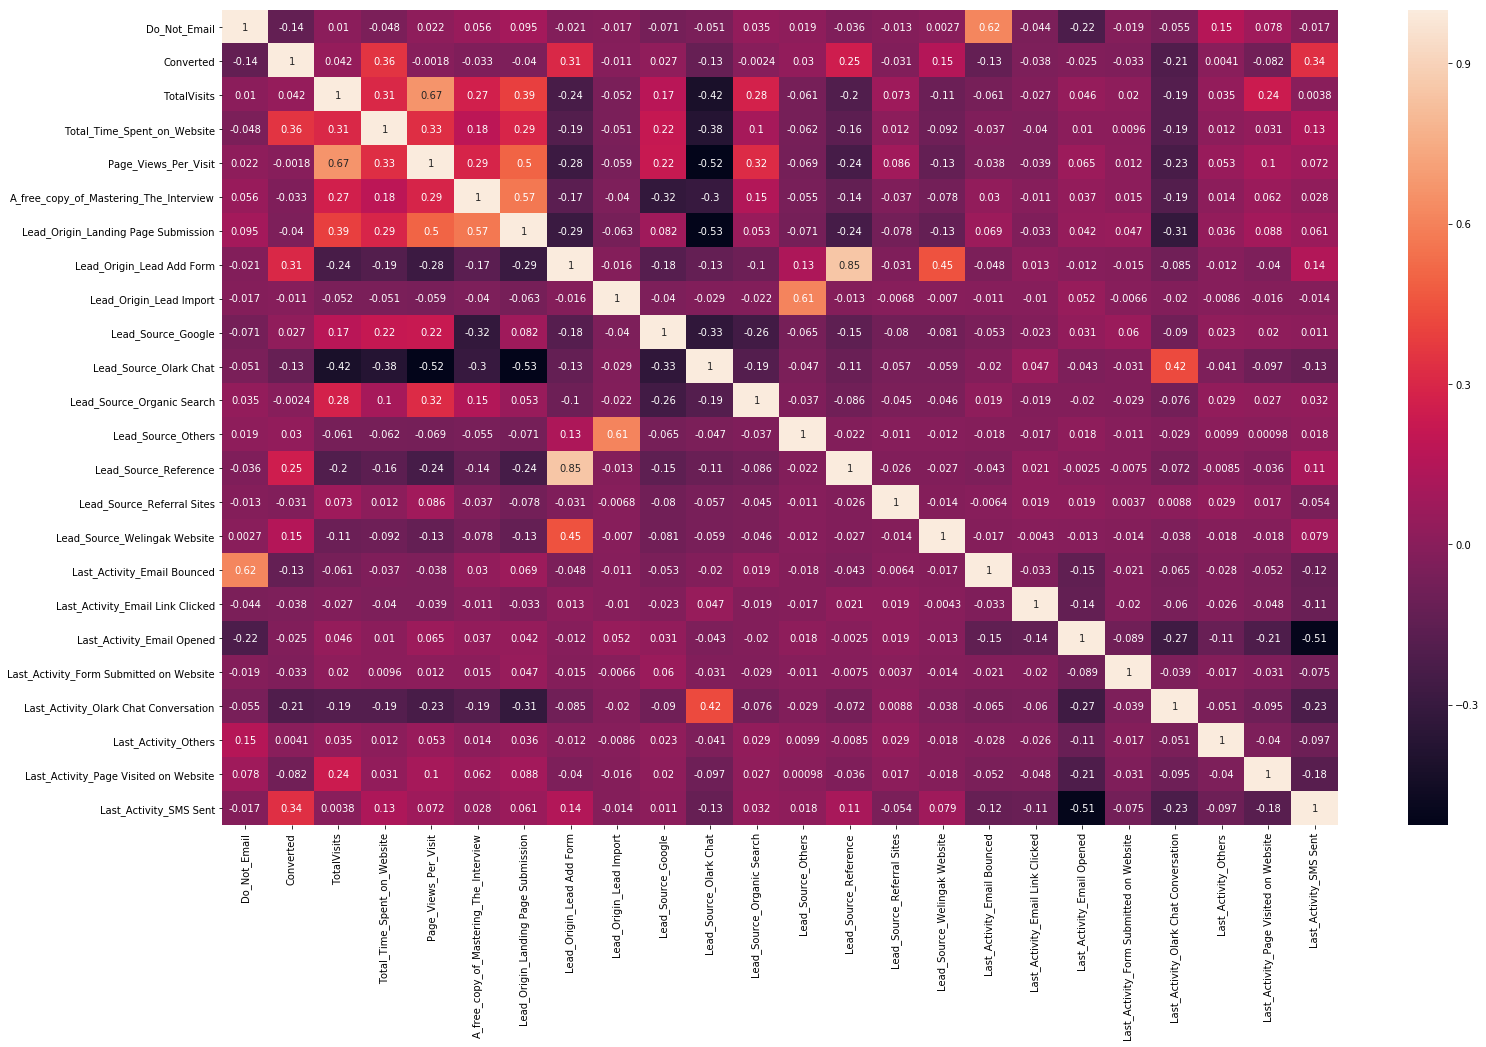

In [68]:
# Let's see the correlation matrix 
plt.figure(figsize = (25,15))        # Size of the figure
sns.heatmap(leads.corr(),annot = True)
plt.show()

In [69]:
#Dropping highly correlated Dummy variables
X_test.drop(['Lead_Source_Others','Lead_Origin_Landing Page Submission','Last_Activity_Email Bounced'],1,inplace=True)
X_train.drop(['Lead_Source_Others','Lead_Origin_Landing Page Submission','Last_Activity_Email Bounced'],1,inplace=True)

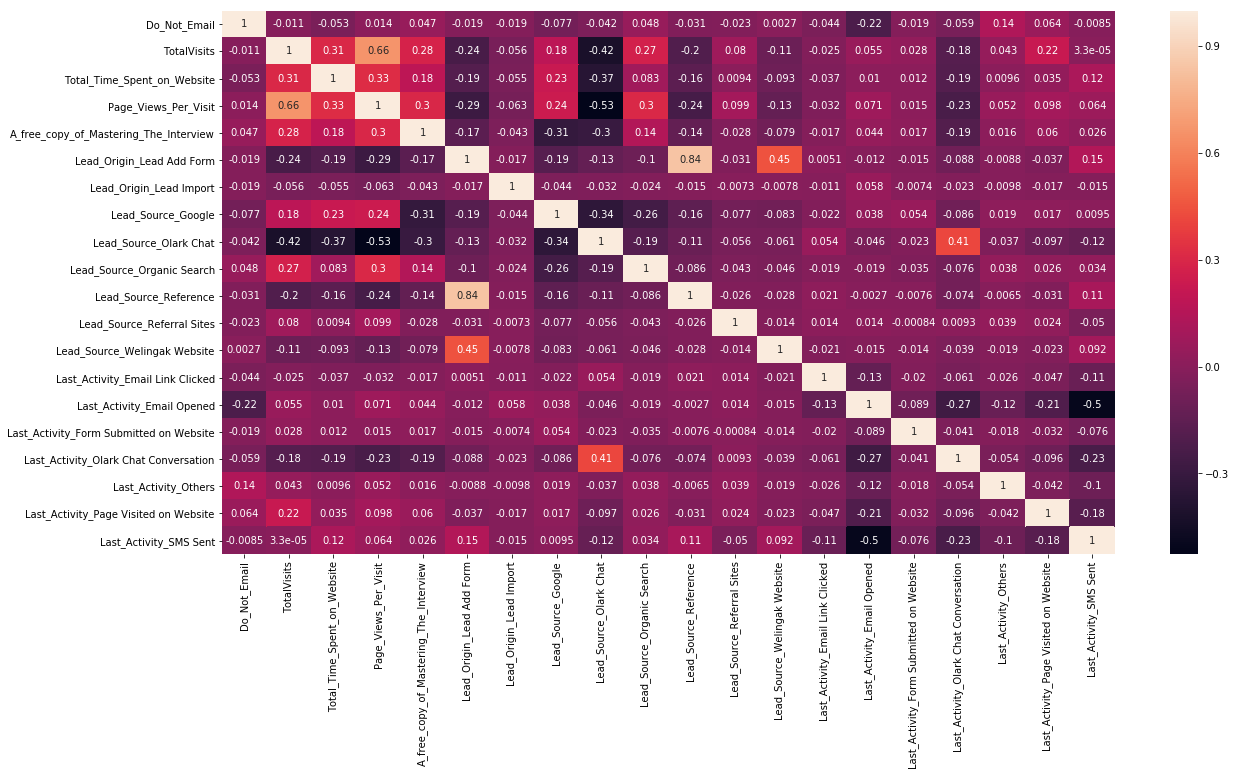

In [70]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [71]:
#Model building
import statsmodels.api as sm

In [72]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6367
Model:                            GLM   Df Residuals:                     6346
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2844.6
Date:                Mon, 10 Jun 2019   Deviance:                       5689.2
Time:                        14:48:31   Pearson chi2:                 6.66e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.3829      0.192    -12.421      0.000      -2.759      -2.007
Do_Not_Email                               -1.3097      0.173     -7.588      0.000      -1.648      -0.971
TotalVisits                                 0.2632      0.044      5.915      0.000       0.176       0.350
Total_Time_Spent_on_Website                 1.0878      0.038     28.337      0.000       1.013       1.163
Page_Views_Per_Visit                       -0.1743      0.050     -3.478      0.001      -0.273      -0.076
A_free_copy_of_Mastering_The_Interview     -0.1148      0.095     -1.209      0.226      -0.301       0.071
Lead_Origin_Lead Add Form                   3.8182      0.646      5.912      0.000       2.552       5.084
Lead_Origin_Lead Import                     1.3204      0.440      2.998      0.003       0.457       2.184
Lead_Source_Google                          0.2611      0.106      2.468      0.014       0.054       0.468
Lead_Source_Olark Chat                      1.1722      0.139      8.408      0.000       0.899       1.445
Lead_Source_Organic Search                  0.1361      0.118      1.155      0.248      -0.095       0.367
Lead_Source_Reference                       0.4212      0.669      0.629      0.529      -0.891       1.733
Lead_Source_Referral Sites                 -0.0913      0.321     -0.284      0.776      -0.721       0.538
Lead_Source_Welingak Website                2.5976      1.201      2.163      0.031       0.244       4.951
Last_Activity_Email Link Clicked            0.6082      0.266      2.284      0.022       0.086       1.130
Last_Activity_Email Opened                  1.1791      0.182      6.473      0.000       0.822       1.536
Last_Activity_Form Submitted on Website     0.5877      0.344      1.709      0.088      -0.086       1.262
Last_Activity_Olark Chat Conversation      -0.4999      0.234     -2.133      0.033      -0.959      -0.041
Last_Activity_Others                        1.7183      0.265      6.492      0.000       1.200       2.237
Last_Activity_Page Visited on Website       0.4048      0.224      1.806      0.071      -0.034       0.844
Last_Activity_SMS Sent                      2.3442      0.182     12.878      0.000       1.987       2.701
===========================================================================================================
"""

In [73]:
#Feature selection using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [74]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 12)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [75]:
rfe.support_

array([ True, False,  True, False, False,  True,  True, False,  True,
       False,  True, False,  True,  True,  True, False,  True,  True,
       False,  True])

In [76]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do_Not_Email', True, 1),
 ('TotalVisits', False, 5),
 ('Total_Time_Spent_on_Website', True, 1),
 ('Page_Views_Per_Visit', False, 6),
 ('A_free_copy_of_Mastering_The_Interview', False, 7),
 ('Lead_Origin_Lead Add Form', True, 1),
 ('Lead_Origin_Lead Import', True, 1),
 ('Lead_Source_Google', False, 4),
 ('Lead_Source_Olark Chat', True, 1),
 ('Lead_Source_Organic Search', False, 9),
 ('Lead_Source_Reference', True, 1),
 ('Lead_Source_Referral Sites', False, 8),
 ('Lead_Source_Welingak Website', True, 1),
 ('Last_Activity_Email Link Clicked', True, 1),
 ('Last_Activity_Email Opened', True, 1),
 ('Last_Activity_Form Submitted on Website', False, 2),
 ('Last_Activity_Olark Chat Conversation', True, 1),
 ('Last_Activity_Others', True, 1),
 ('Last_Activity_Page Visited on Website', False, 3),
 ('Last_Activity_SMS Sent', True, 1)]

In [77]:
col = X_train.columns[rfe.support_]
col

Index(['Do_Not_Email', 'Total_Time_Spent_on_Website',
       'Lead_Origin_Lead Add Form', 'Lead_Origin_Lead Import',
       'Lead_Source_Olark Chat', 'Lead_Source_Reference',
       'Lead_Source_Welingak Website', 'Last_Activity_Email Link Clicked',
       'Last_Activity_Email Opened', 'Last_Activity_Olark Chat Conversation',
       'Last_Activity_Others', 'Last_Activity_SMS Sent'],
      dtype='object')

In [78]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page_Views_Per_Visit',
       'A_free_copy_of_Mastering_The_Interview', 'Lead_Source_Google',
       'Lead_Source_Organic Search', 'Lead_Source_Referral Sites',
       'Last_Activity_Form Submitted on Website',
       'Last_Activity_Page Visited on Website'],
      dtype='object')

In [79]:
#Assessing the model with StatsModels
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6367
Model:                            GLM   Df Residuals:                     6354
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2876.3
Date:                Mon, 10 Jun 2019   Deviance:                       5752.7
Time:                        14:48:54   Pearson chi2:                 6.62e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.9470      0.103    -18.891      0.000      -2.149      -1.745
Do_Not_Email                             -1.4180      0.169     -8.395      0.000      -1.749      -1.087
Total_Time_Spent_on_Website               1.0973      0.038     28.811      0.000       1.023       1.172
Lead_Origin_Lead Add Form                 3.7146      0.638      5.820      0.000       2.464       4.966
Lead_Origin_Lead Import                   1.1681      0.428      2.729      0.006       0.329       2.007
Lead_Source_Olark Chat                    1.0350      0.097     10.638      0.000       0.844       1.226
Lead_Source_Reference                     0.3914      0.670      0.584      0.559      -0.922       1.704
Lead_Source_Welingak Website              2.5435      1.198      2.124      0.034       0.196       4.891
Last_Activity_Email Link Clicked          0.2910      0.223      1.304      0.192      -0.147       0.729
Last_Activity_Email Opened                0.8506      0.112      7.562      0.000       0.630       1.071
Last_Activity_Olark Chat Conversation    -0.7901      0.185     -4.275      0.000      -1.152      -0.428
Last_Activity_Others                      1.4334      0.224      6.404      0.000       0.995       1.872
Last_Activity_SMS Sent                    1.9921      0.114     17.439      0.000       1.768       2.216
=========================================================================================================
"""

In [80]:
#Let's drop Lead_Source_Reference, high p-value

col = col.drop('Lead_Source_Reference')
col

Index(['Do_Not_Email', 'Total_Time_Spent_on_Website',
       'Lead_Origin_Lead Add Form', 'Lead_Origin_Lead Import',
       'Lead_Source_Olark Chat', 'Lead_Source_Welingak Website',
       'Last_Activity_Email Link Clicked', 'Last_Activity_Email Opened',
       'Last_Activity_Olark Chat Conversation', 'Last_Activity_Others',
       'Last_Activity_SMS Sent'],
      dtype='object')

In [81]:
#Rerun the model
#Assessing the model with StatsModels
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6367
Model:                            GLM   Df Residuals:                     6355
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2876.5
Date:                Mon, 10 Jun 2019   Deviance:                       5753.0
Time:                        14:49:04   Pearson chi2:                 6.61e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.9460      0.103    -18.887      0.000      -2.148      -1.744
Do_Not_Email                             -1.4236      0.169     -8.426      0.000      -1.755      -1.092
Total_Time_Spent_on_Website               1.0972      0.038     28.808      0.000       1.023       1.172
Lead_Origin_Lead Add Form                 4.0712      0.211     19.324      0.000       3.658       4.484
Lead_Origin_Lead Import                   1.1677      0.428      2.728      0.006       0.329       2.007
Lead_Source_Olark Chat                    1.0345      0.097     10.633      0.000       0.844       1.225
Lead_Source_Welingak Website              2.1880      1.036      2.111      0.035       0.157       4.219
Last_Activity_Email Link Clicked          0.2927      0.223      1.312      0.189      -0.144       0.730
Last_Activity_Email Opened                0.8500      0.112      7.558      0.000       0.630       1.070
Last_Activity_Olark Chat Conversation    -0.7905      0.185     -4.277      0.000      -1.153      -0.428
Last_Activity_Others                      1.4289      0.224      6.381      0.000       0.990       1.868
Last_Activity_SMS Sent                    1.9913      0.114     17.434      0.000       1.767       2.215
=========================================================================================================
"""

In [82]:
#Let's drop Last_Activity_Olark Chat Conversation, high p-value

col = col.drop('Last_Activity_Email Link Clicked')
col

Index(['Do_Not_Email', 'Total_Time_Spent_on_Website',
       'Lead_Origin_Lead Add Form', 'Lead_Origin_Lead Import',
       'Lead_Source_Olark Chat', 'Lead_Source_Welingak Website',
       'Last_Activity_Email Opened', 'Last_Activity_Olark Chat Conversation',
       'Last_Activity_Others', 'Last_Activity_SMS Sent'],
      dtype='object')

In [83]:
#Rerun the model
#Assessing the model with StatsModels
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6367
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2877.3
Date:                Mon, 10 Jun 2019   Deviance:                       5754.7
Time:                        14:49:29   Pearson chi2:                 6.61e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.8905      0.093    -20.366      0.000      -2.072      -1.709
Do_Not_Email                             -1.4417      0.168     -8.581      0.000      -1.771      -1.112
Total_Time_Spent_on_Website               1.0960      0.038     28.808      0.000       1.021       1.171
Lead_Origin_Lead Add Form                 4.0890      0.211     19.415      0.000       3.676       4.502
Lead_Origin_Lead Import                   1.1688      0.428      2.730      0.006       0.330       2.008
Lead_Source_Olark Chat                    1.0449      0.097     10.758      0.000       0.855       1.235
Lead_Source_Welingak Website              2.1673      1.036      2.092      0.036       0.137       4.197
Last_Activity_Email Opened                0.7921      0.103      7.725      0.000       0.591       0.993
Last_Activity_Olark Chat Conversation    -0.8529      0.178     -4.787      0.000      -1.202      -0.504
Last_Activity_Others                      1.3764      0.220      6.260      0.000       0.945       1.807
Last_Activity_SMS Sent                    1.9348      0.105     18.451      0.000       1.729       2.140
=========================================================================================================
"""

In [84]:
#Model p-value looks fine, Checking VIFs
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead_Source_Olark Chat,1.73
2,Lead_Origin_Lead Add Form,1.46
7,Last_Activity_Olark Chat Conversation,1.38
1,Total_Time_Spent_on_Website,1.27
5,Lead_Source_Welingak Website,1.27
9,Last_Activity_SMS Sent,1.22
6,Last_Activity_Email Opened,1.16
0,Do_Not_Email,1.06
8,Last_Activity_Others,1.04
3,Lead_Origin_Lead Import,1.02


In [86]:
res.params.sort_values(ascending=False)

Lead_Origin_Lead Add Form                4.088959
Lead_Source_Welingak Website             2.167301
Last_Activity_SMS Sent                   1.934812
Last_Activity_Others                     1.376435
Lead_Origin_Lead Import                  1.168817
Total_Time_Spent_on_Website              1.096047
Lead_Source_Olark Chat                   1.044885
Last_Activity_Email Opened               0.792119
Last_Activity_Olark Chat Conversation   -0.852852
Do_Not_Email                            -1.441659
const                                   -1.890514
dtype: float64

In [87]:
#All VIF values are fine, finalizing the model 

# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2991    0.395925
1904    0.361721
1510    0.611342
9007    0.345121
6738    0.694802
6127    0.267608
294     0.179332
5522    0.500320
1011    0.536481
5150    0.241876
dtype: float64

In [88]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.39592461, 0.36172149, 0.61134179, 0.3451207 , 0.69480176,
       0.26760821, 0.17933199, 0.50031961, 0.53648102, 0.24187566])

In [89]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,CustID
0,1,0.395925,2991
1,0,0.361721,1904
2,1,0.611342,1510
3,0,0.345121,9007
4,1,0.694802,6738


In [90]:
#Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0¶

y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Convert,Convert_Prob,CustID,predicted
0,1,0.395925,2991,0
1,0,0.361721,1904,0
2,1,0.611342,1510,1
3,0,0.345121,9007,0
4,1,0.694802,6738,1


In [91]:
from sklearn import metrics

In [92]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
print(confusion)

[[3483  484]
 [ 814 1586]]


In [93]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

0.7961363279409455


In [94]:
#Metrics
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [95]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6608333333333334

In [96]:
# Let us calculate specificity
TN / float(TN+FP)

0.8779934459289135

In [97]:
# Calculate false postive rate - predicting convert when customer does not have converted
print(FP/ float(TN+FP))

0.12200655407108646


In [98]:
# positive predictive value 
print (TP / float(TP+FP))

0.7661835748792271


In [99]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8105655108215034


In [103]:
#Precision
TP/(TP+FP)

0.7661835748792271

In [104]:
#Plotting ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [105]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )

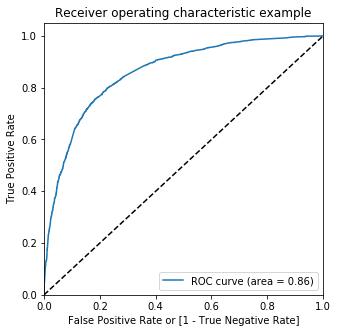

In [106]:
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

In [107]:
#Finding Optimal Cutoff Point
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.395925,2991,0,1,1,1,1,0,0,0,0,0,0
1,0,0.361721,1904,0,1,1,1,1,0,0,0,0,0,0
2,1,0.611342,1510,1,1,1,1,1,1,1,1,0,0,0
3,0,0.345121,9007,0,1,1,1,1,0,0,0,0,0,0
4,1,0.694802,6738,1,1,1,1,1,1,1,1,0,0,0


In [108]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.376944  1.000000  0.000000
0.1   0.1  0.569028  0.974583  0.323670
0.2   0.2  0.703314  0.911667  0.577262
0.3   0.3  0.769907  0.822083  0.738341
0.4   0.4  0.794880  0.745417  0.824805
0.5   0.5  0.796136  0.660833  0.877993
0.6   0.6  0.775404  0.534583  0.921099
0.7   0.7  0.758913  0.448333  0.946811
0.8   0.8  0.727815  0.329583  0.968742
0.9   0.9  0.677242  0.160833  0.989665


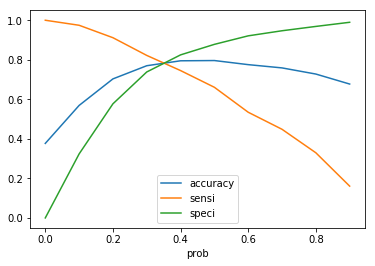

In [109]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [132]:
#From the curve above, 0.35 is the optimum point to take it as a cutoff probability.
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.55 else 0)

y_train_pred_final.head()

,Convert,Convert_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.395925,2991,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.361721,1904,0,1,1,1,1,0,0,0,0,0,0,0
2,1,0.611342,1510,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.345121,9007,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.694802,6738,1,1,1,1,1,1,1,1,0,0,0,1


In [133]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.final_predicted)

0.7820009423590388

In [134]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.final_predicted )
confusion2

array([[3608,  359],
       [1029, 1371]], dtype=int64)

In [135]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [136]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.57125

In [137]:
# Let us calculate specificity
TN / float(TN+FP)

0.9095034030753718

In [138]:
# Calculate false postive rate - 
print(FP/ float(TN+FP))

0.09049659692462818


In [139]:
# Positive predictive value 
print (TP / float(TP+FP))

0.792485549132948


In [140]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7780892818632736


In [141]:
##### Precision
#TP / TP + FP

TP/(TP+FP)

0.792485549132948

In [120]:
#On Train data set with 0.35 as threshold overall accuracy is 79% and Sensitivity is also 79%
#Let's validate the model on Test dataset

In [121]:
X_test[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']] = scaler.transform(X_test[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']])

C:\Users\Kavita Jain\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [118]:
X_test = X_test[col]
X_test.head()

,Do_Not_Email,Total_Time_Spent_on_Website,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Welingak Website,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Others,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent
2692,0,-0.869744,0,0,0,1,0,0,0,0,0,0,0
3963,0,1.711867,0,0,0,0,0,0,0,0,0,0,1
8584,0,-0.716910,0,0,0,0,0,0,0,0,0,0,1
1145,0,-0.090841,0,0,0,0,0,0,1,0,0,0,0
8660,1,-0.046648,0,0,1,0,0,0,0,0,0,0,0


In [119]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,Do_Not_Email,Total_Time_Spent_on_Website,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Welingak Website,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Others,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent
2692,1.0,0,-0.869744,0,0,0,1,0,0,0,0,0,0,0
3963,1.0,0,1.711867,0,0,0,0,0,0,0,0,0,0,1
8584,1.0,0,-0.716910,0,0,0,0,0,0,0,0,0,0,1
1145,1.0,0,-0.090841,0,0,0,0,0,0,1,0,0,0,0
8660,1.0,1,-0.046648,0,0,1,0,0,0,0,0,0,0,0


Making predictions on the test set

In [120]:
y_test_pred = res.predict(X_test_sm)

In [121]:
y_test_pred[:10]

2692    0.073783
3963    0.858834
8584    0.299393
1145    0.213321
8660    0.022496
6678    0.268310
8905    0.510978
5210    0.882557
7563    0.522782
7595    0.115688
dtype: float64

In [122]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [123]:
# Let's see the head
y_pred_1.head()

,0
2692,0.073783
3963,0.858834
8584,0.299393
1145,0.213321
8660,0.022496


In [124]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [125]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [126]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [127]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [128]:
y_pred_final.head()

,Converted,CustID,0
0,0,2692,0.073783
1,1,3963,0.858834
2,0,8584,0.299393
3,0,1145,0.213321
4,0,8660,0.022496


In [129]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [130]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','Converted','Convert_Prob'], axis=1)

In [131]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Converted,Convert_Prob
0,2692,0,0.073783
1,3963,1,0.858834
2,8584,0,0.299393
3,1145,0,0.213321
4,8660,0,0.022496


In [132]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [133]:
y_pred_final.head()

,CustID,Converted,Convert_Prob,final_predicted
0,2692,0,0.073783,0
1,3963,1,0.858834,1
2,8584,0,0.299393,0
3,1145,0,0.213321,0
4,8660,0,0.022496,0


In [134]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7874679369732502

In [135]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1303,  367],
       [ 213,  846]], dtype=int64)

In [136]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [137]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7988668555240793

In [138]:
# Let us calculate specificity
TN / float(TN+FP)

0.7802395209580838

In [139]:
#Model is giving 79% as overall accuracy and 80% Sensitivity on Test dataset
#CEO wanted 80% lead conversion rate, Sensitivity is giving that information
#Model is good enough
#Further Lead converion probability score is being mapped to each lead

In [140]:
y_train_pred_final.head()

,Convert,Convert_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.376652,2991,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.396641,1904,0,1,1,1,1,0,0,0,0,0,0,1
2,1,0.645560,1510,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.379430,9007,0,1,1,1,1,0,0,0,0,0,0,1
4,1,0.724687,6738,1,1,1,1,1,1,1,1,1,0,0,1


In [141]:
y_pred_final.head()

,CustID,Converted,Convert_Prob,final_predicted
0,2692,0,0.073783,0
1,3963,1,0.858834,1
2,8584,0,0.299393,0
3,1145,0,0.213321,0
4,8660,0,0.022496,0


In [142]:
y_train_pred_final[['CustID','Convert_Prob']].head()

,CustID,Convert_Prob
0,2991,0.376652
1,1904,0.396641
2,1510,0.645560
3,9007,0.379430
4,6738,0.724687


In [143]:
merged = pd.concat([y_train_pred_final[['CustID','Convert_Prob']],y_pred_final[['CustID','Convert_Prob']]],0)

In [144]:
merged_1 = merged.sort_values(by='CustID')

In [145]:
#leads_mapping = leads_mapping.append(merged_1.CustID,ignore_index = False)
leads_mapping.reset_index(inplace=True, drop=True)
merged_1.reset_index(inplace=True, drop=True)

finalDf = pd.concat([leads_mapping, merged_1.Convert_Prob ], axis = 1)
finalDf.Convert_Prob = round(finalDf.Convert_Prob * 100, 2)

finalDf.head()

#finalDf is giving the Lead converion probability for each lead on a scale of 0-100, 100 being highest

,Prospect_ID,Lead_Number,Convert_Prob
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,15.96
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,31.01
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,71.67
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,26.93
4,3256f628-e534-4826-9d63-4a8b88782852,660681,37.62
